# Databases Pt. 2
Guest lecture by Bradley Dice, [@bdice](https://github.com/bdice/).

## Example, continued: *IMBD*, Index of Marvel data with Bradley Dice
The code below sets up the movie database that we created last time, all in one cell.

In [1]:
import sqlite3
import os

database = 'movie_ratings.sqlite'

# Removes the database if it already exists
if os.path.exists(database):
    os.remove(database)
    
with sqlite3.connect(database) as conn:
    # Here we create a primary key, and use "NOT NULL" to prevent inserting invalid data
    conn.execute(
        """CREATE TABLE Movies
        (id INTEGER PRIMARY KEY AUTOINCREMENT, title TEXT NOT NULL, year INTEGER NOT NULL)""")
    conn.executemany(
        """INSERT INTO Movies (title, year) VALUES (?,?)""",
        [('Iron Man', 2008),
         ('The Incredible Hulk', 2008),
         ('Iron Man 2', 2010),
         ('Thor', 2011),
         ('Captain America: The First Avenger', 2011),
         ('The Avengers', 2012),
         ('Iron Man 3', 2013),
         ('Captain America: The Winter Soldier', 2014),
         ('Avengers: Age of Ultron', 2015),
         ('Captain America: Civil War', 2016),
         ('Doctor Strange', 2016),
         ('Black Panther', 2018),
         ('Avengers: Infinity War', 2018),
        ])
    conn.execute(
        """CREATE TABLE Actors
        (id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT NOT NULL,
        last_name TEXT NOT NULL,
        character TEXT NOT NULL,
        age REAL NOT NULL)""")
    conn.executemany(
        """INSERT INTO Actors (first_name, last_name, character, age) VALUES (?,?,?,?)""",
        [('Robert', 'Downey Jr.', 'Iron Man', 53),
         ('Chris', 'Evans', 'Captain America', 37),
         ('Scarlett', 'Johansson', 'Black Widow', 33),
         ('Samuel L.', 'Jackson', 'Nick Fury', 69),
         ('Benedict', 'Cumberbatch', 'Dr. Strange', 42),
         ('Brie', 'Larson', 'Captain Marvel', 29),
         ('Chadwick', 'Boseman', 'Black Panther', 40)
        ])
    conn.execute(
        """CREATE TABLE MovieActors
        (id INTEGER PRIMARY KEY AUTOINCREMENT, movie_id INTEGER NOT NULL, actor_id INTEGER NOT NULL)""")
    conn.executemany(
        """INSERT INTO MovieActors (movie_id, actor_id) VALUES (?,?)""",
        [(1, 1), (2, 1), (3, 1), (6, 1), (7, 1), (9, 1), (10, 1), (13, 1), (5, 2), (6, 2), (8, 2), (9, 2), (10, 2), (13, 2),
        (3, 3), (6, 3), (8, 3), (9, 3), (10, 3), (13, 3), (1, 4), (3, 4), (4, 4), (5, 4), (6, 4), (8, 4), (9, 4), (13, 4),
        (11, 5), (13, 5), (10, 7), (12, 7), (13, 7)])

## JOINing ~~forces~~ tables
This demonstrates a `JOIN` operation. There are different kinds of JOINs, explained nicely in [this resource](https://community.modeanalytics.com/sql/tutorial/sql-joins/).

In [2]:
with sqlite3.connect(database) as conn:
    results = conn.execute(
        """SELECT * FROM MovieActors
        JOIN Movies ON MovieActors.movie_id = Movies.id
        JOIN Actors ON MovieActors.actor_id = Actors.id""")
    print(list(results))

[(1, 1, 1, 1, 'Iron Man', 2008, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (2, 2, 1, 2, 'The Incredible Hulk', 2008, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (3, 3, 1, 3, 'Iron Man 2', 2010, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (4, 6, 1, 6, 'The Avengers', 2012, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (5, 7, 1, 7, 'Iron Man 3', 2013, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (6, 9, 1, 9, 'Avengers: Age of Ultron', 2015, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (7, 10, 1, 10, 'Captain America: Civil War', 2016, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (8, 13, 1, 13, 'Avengers: Infinity War', 2018, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (9, 5, 2, 5, 'Captain America: The First Avenger', 2011, 2, 'Chris', 'Evans', 'Captain America', 37.0), (10, 6, 2, 6, 'The Avengers', 2012, 2, 'Chris', 'Evans', 'Captain America', 37.0), (11, 8, 2, 8, 'Captain America: The Winter Soldier', 2014, 2, 'Chris', 'Evans', 'Captain America', 37.0), (12, 9, 2, 9, 'Aveng

### Using pandas 🐼 to help us:

In [3]:
import pandas as pd
with sqlite3.connect(database) as conn:
    df = pd.read_sql('SELECT * FROM Movies', conn)
    print(df)
    df.hist('year')

    id                                title  year
0    1                             Iron Man  2008
1    2                  The Incredible Hulk  2008
2    3                           Iron Man 2  2010
3    4                                 Thor  2011
4    5   Captain America: The First Avenger  2011
5    6                         The Avengers  2012
6    7                           Iron Man 3  2013
7    8  Captain America: The Winter Soldier  2014
8    9              Avengers: Age of Ultron  2015
9   10           Captain America: Civil War  2016
10  11                       Doctor Strange  2016
11  12                        Black Panther  2018
12  13               Avengers: Infinity War  2018


So how long have these actors been doing Marvel movies, anyway?

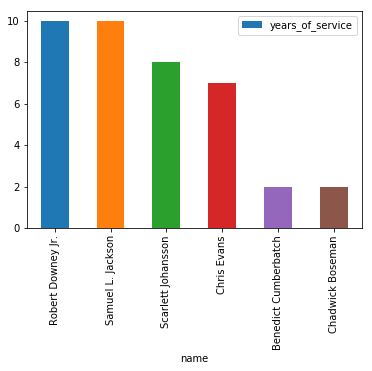

In [4]:
with sqlite3.connect(database) as conn:
    df = pd.read_sql("""SELECT MAX(Movies.year) - MIN(Movies.year) as years_of_service,
    Actors.first_name || " " || Actors.last_name as name FROM MovieActors
        JOIN Movies ON MovieActors.movie_id = Movies.id
        JOIN Actors ON MovieActors.actor_id = Actors.id
        GROUP BY name
        ORDER BY years_of_service DESC""", conn)
    df.plot.bar(x='name', y='years_of_service')

And how old were they when they started?

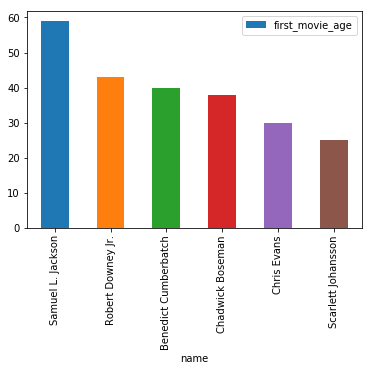

In [5]:
with sqlite3.connect(database) as conn:
    df = pd.read_sql("""SELECT Actors.age - (MAX(Movies.year) - MIN(Movies.year)) as first_movie_age,
    Actors.first_name || " " || Actors.last_name as name FROM MovieActors
        JOIN Movies ON MovieActors.movie_id = Movies.id
        JOIN Actors ON MovieActors.actor_id = Actors.id
        GROUP BY name
        ORDER BY first_movie_age DESC""", conn)
    df.plot.bar(x='name', y='first_movie_age')

We can visualize this data in many ways, including this graph. (Note that Brie Larson appears, who was absent from our earlier plots because her movie, Captain Marvel, hasn't been released yet.)

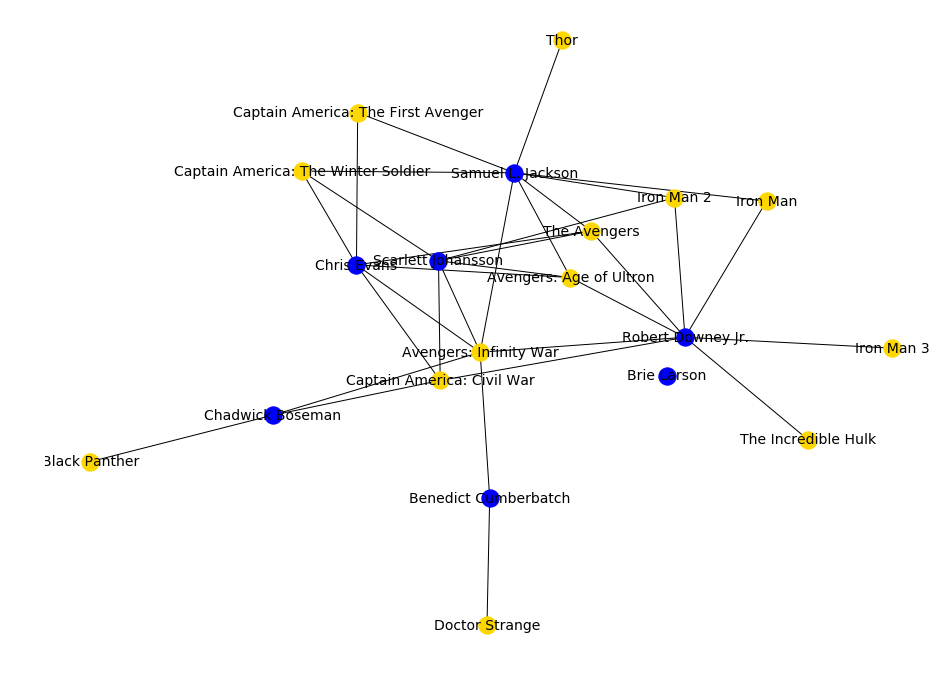

In [6]:
# Fancy demo, requires networkx
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Create a networkx Graph object
G = nx.Graph()

# Fetch data and fill the graph
with sqlite3.connect(database) as conn:
    movies = conn.execute("""SELECT title FROM Movies""")
    G.add_nodes_from([movie[0] for movie in movies], bipartite=0)
    actors = conn.execute("""SELECT first_name || " " || last_name FROM Actors""")
    G.add_nodes_from([actor[0] for actor in actors], bipartite=1)
    edges = conn.execute("""SELECT Movies.title, Actors.first_name || " " || Actors.last_name FROM MovieActors
        JOIN Movies ON MovieActors.movie_id = Movies.id
        JOIN Actors ON MovieActors.actor_id = Actors.id""")
    G.add_edges_from(edges)

# Plot the graph
plt.figure(figsize=(16, 12))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=[n for n, d in G.nodes(data=True) if d['bipartite']==0], node_color='gold')
nx.draw_networkx_nodes(G, pos, nodelist=[n for n, d in G.nodes(data=True) if d['bipartite']==1], node_color='blue')
nx.draw_networkx_labels(G, pos, font_size=14)
nx.draw_networkx_edges(G, pos)
plt.axis('off')
plt.show()

Observation: Avengers movies are near the center! What else could we learn from this data?

What if we wanted to add ratings? What kind of mapping is needed? What table columns would we use?

### Sources

Database reference material:
- https://en.wikipedia.org/wiki/NoSQL
- https://docs.python.org/3.7/library/sqlite3.html
- https://community.modeanalytics.com/sql/tutorial/sql-joins/

Other Python packages used:
- https://networkx.github.io/documentation/stable/
- https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.read_sql.html

Raw data:
- https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_film_actors